In [14]:

import numpy as np
import streamlit
import pandas as pd
from datetime import datetime
import re
import sys
import sklearn
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import *
from sklearn.model_selection import train_test_split
from matplotlib import  pyplot as plt
import seaborn as sns
import sklearn.metrics as sm

In [15]:

#version of library and system used
print('Python: {}.{}.{}'.format(*sys.version_info[:3]))
print('numpy: {}'.format(np.__version__))
print('pandas: {}'.format(pd.__version__))
#print('pyplot: {}'.format(pl.__version__))
print('re: {}'.format(re.__version__))
print('scikit-learn {}.'.format(sklearn.__version__))

Python: 3.8.3
numpy: 1.18.5
pandas: 1.0.5
re: 2.2.1
scikit-learn 0.23.1.


In [16]:

weather = pd.read_csv("weather.Ulsan.6hr.2007-2017.csv")
weather

,time,temperature,precipitation,wind_speed,wind_direction,humadity,pressure
0,2007010100,2.0,0.0,0.6,318.7,76.7,1029.3
1,2007010106,4.1,0.0,0.8,345.9,71.0,1027.7
2,2007010112,11.6,0.0,2.0,56.9,35.7,1024.6
3,2007010118,9.2,0.0,1.3,325.0,41.8,1024.3
4,2007010200,6.7,0.0,0.8,307.2,74.2,1024.4
...,...,...,...,...,...,...,...
16067,2017123018,7.0,0.0,2.0,334.9,73.0,1020.9
16068,2017123100,6.2,0.0,2.4,289.3,65.3,1018.0
16069,2017123106,5.2,0.0,3.8,316.8,55.2,1019.2
16070,2017123112,6.1,0.0,4.4,315.1,26.2,1020.0


In [17]:
weather.drop(weather.index[0:15072],0,inplace=True)
weather.columns = list(map(lambda x: re.sub(" \[.*\]","",x) ,weather.columns))
weather.time = weather.time.map(lambda x:datetime.strptime(str(x),"%Y%m%d%H"))
weather

,time,temperature,precipitation,wind_speed,wind_direction,humadity,pressure
15072,2017-04-26 00:00:00,16.4,0.0,2.1,322.8,79.7,1016.5
15073,2017-04-26 06:00:00,13.7,0.3,1.3,22.4,93.0,1017.1
15074,2017-04-26 12:00:00,14.6,0.0,1.8,142.7,82.8,1014.2
15075,2017-04-26 18:00:00,13.6,0.0,1.3,94.3,92.8,1012.8
15076,2017-04-27 00:00:00,11.1,0.0,2.0,336.0,68.8,1012.4
...,...,...,...,...,...,...,...
16067,2017-12-30 18:00:00,7.0,0.0,2.0,334.9,73.0,1020.9
16068,2017-12-31 00:00:00,6.2,0.0,2.4,289.3,65.3,1018.0
16069,2017-12-31 06:00:00,5.2,0.0,3.8,316.8,55.2,1019.2
16070,2017-12-31 12:00:00,6.1,0.0,4.4,315.1,26.2,1020.0


In [18]:

weather["time"]=list(range(len(weather)))

In [19]:
#define parameters 
X = weather[['time', "wind_speed","humadity","pressure","wind_direction"]]
y = weather['temperature']
cols = ["time","wind_speed","humadity","pressure","precipitation"]

In [20]:

x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.1, random_state=3)

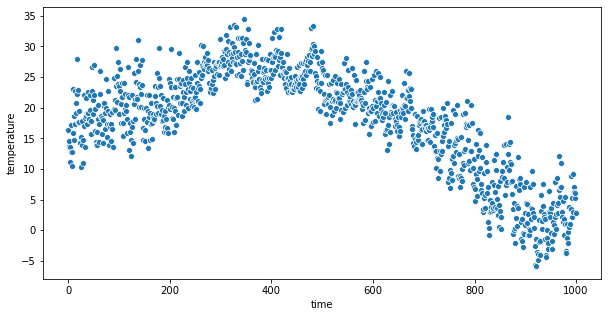

In [21]:
plt.figure(figsize=(10,5))
plt.xlabel('time')
plt.ylabel('temperature')
sns.scatterplot(weather['time'],weather['temperature'])
plt.show()

In [22]:
#kernels

k1 = RationalQuadratic(alpha = 0.1, length_scale = 1)
k2 = RationalQuadratic(alpha = 0.1, length_scale = 0.5)
k3 = RationalQuadratic(alpha = 2, length_scale = 0.5)
k4 = ExpSineSquared(length_scale = 0.1, periodicity = 5)
k5 = Matern(length_scale=1.1, nu=3 / 2)
k6 = Matern(length_scale=1.1, nu=5 / 2)
k7 = RBF(length_scale = 1)
k8 = RBF(length_scale = 0.1)
k9 = RBF(length_scale = 0.1)*RationalQuadratic(alpha = 0.1, length_scale = 0.5)
k10= ConstantKernel(1.0, (1e-3, 1e3))*(RBF([1. for _ in cols], (1e-5, 10))+ConstantKernel(1.0, (1e-3, 1e3)) + DotProduct()) 
#RBF([.1, .1, .1, .1, .1, .1], (1e-5, 10))#

In [23]:

gp = GaussianProcessRegressor(kernel=k9, n_restarts_optimizer=9)

In [24]:
gp?

Type:        GaussianProcessRegressor
String form:
GaussianProcessRegressor(kernel=RBF(length_scale=0.1) * RationalQuadratic(alpha=0.1, length_scale=0.5),
                         n_restarts_optimizer=9)
File:        d:\anaconda\lib\site-packages\sklearn\gaussian_process\_gpr.py
Docstring:  
Gaussian process regression (GPR).

The implementation is based on Algorithm 2.1 of Gaussian Processes
for Machine Learning (GPML) by Rasmussen and Williams.

In addition to standard scikit-learn estimator API,
GaussianProcessRegressor:

   * allows prediction without prior fitting (based on the GP prior)
   * provides an additional method sample_y(X), which evaluates samples
     drawn from the GPR (prior or posterior) at given inputs
   * exposes a method log_marginal_likelihood(theta), which can be used
     externally for other ways of selecting hyperparameters, e.g., via
     Markov chain Monte Carlo.

Read more in the :ref:`User Guide <gaussian_process>`.

.. versionadded:: 0.18

Parameters
-

In [25]:
gp.fit(x_train,y_train)


GaussianProcessRegressor(kernel=RBF(length_scale=0.1) * RationalQuadratic(alpha=0.1, length_scale=0.5),
                         n_restarts_optimizer=9)

In [26]:
x_test

,time,wind_speed,humadity,pressure,wind_direction
15714,642,2.6,79.2,1017.3,16.7
15834,762,1.4,54.2,1016.2,115.0
15981,909,1.2,54.3,1021.2,357.8
15271,199,1.0,77.0,1007.8,158.4
15658,586,1.9,49.7,1009.1,252.0
...,...,...,...,...,...
15193,121,1.3,69.0,1006.0,237.1
15342,270,3.8,89.7,1008.4,196.7
15082,10,4.6,21.7,1003.2,208.5
15911,839,2.2,66.7,1023.3,222.6


In [27]:
#2.65**2 * RBF(length_scale=[4.03, 10, 10, 10]) + 2.55**2 + DotProduct(y_std_0=14.3) : kernel result

predicted_temperature, y_std = gp.predict(x_test, return_std=True)
origin_temperature = pd.Series(y_test)
predicted_temperature = pd.Series(predicted_temperature)
origin_temperature.to_csv("origin_temperature.csv",index=False,header=None)
predicted_temperature.to_csv("predicted_temperature.csv",index=False,header=None)

In [28]:
origin_temperature = pd.read_csv("origin_temperature.csv",header=None)
predicted_temperature = pd.read_csv("predicted_temperature.csv",header=None)
origin_temperature

,0
0,20.2
1,18.9
2,0.0
3,20.5
4,27.5
...,...
95,16.0
96,27.1
97,23.1
98,7.4


In [29]:

predicted_temperature

,0
0,19.157690
1,16.222276
2,3.061927
3,22.504510
4,23.179827
...,...
95,21.280169
96,26.044460
97,20.439923
98,12.023527


In [30]:
df2 = pd.DataFrame({'Actual': origin_temperature[0].describe(), 'Predicted': predicted_temperature[0].describe()})
df2

,Actual,Predicted
count,100.000000,100.000000
mean,17.073000,17.355066
std,7.710597,7.012396
min,-0.400000,0.832920
25%,13.700000,12.945477
50%,18.700000,19.082513
75%,23.125000,22.651994
max,30.000000,28.762845


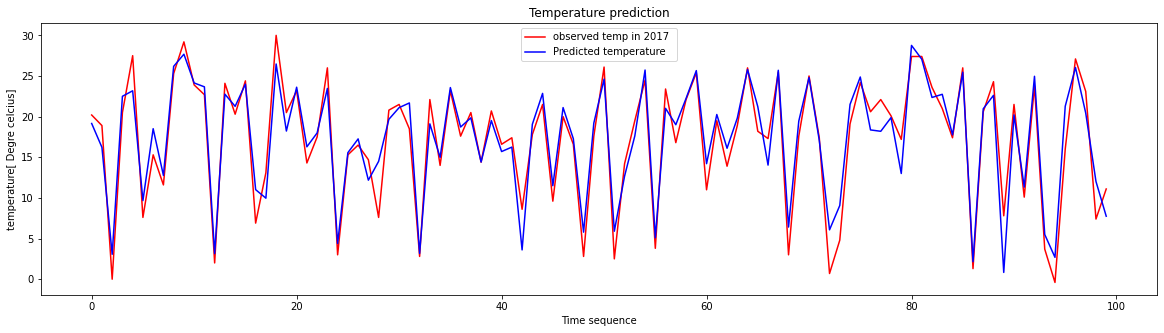

In [31]:
# visualizing the whole training data results
train_size=len(x_train)
fig = plt.figure(figsize=[20,5])
ax = fig.add_subplot(1,1,1)
plt.plot(origin_temperature, color = 'red', label = 'observed temp in 2017 ')
plt.plot(predicted_temperature, color = 'blue', label = 'Predicted temperature')
plt.title('Temperature prediction')
plt.xlabel('Time sequence')
plt.ylabel('temperature[ Degre celcius]')
plt.legend()
plt.show()

In [32]:
print("Mean absolute error =", round(sm.mean_absolute_error(origin_temperature, predicted_temperature), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(origin_temperature, predicted_temperature), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(origin_temperature , predicted_temperature), 2))


Mean absolute error = 1.87
Median absolute error = 1.36
Explain variance score = 0.9


In [33]:
print("test set>")
print("\t", "MSE: ", sm.mean_squared_error(origin_temperature, predicted_temperature))
print("\t", "RMSE: ", np.sqrt(sm.mean_squared_error(origin_temperature, y_test,squared=True)))
print("\t", "r2 score: ", sm.r2_score(origin_temperature, y_test),)

test set>
	 MSE:  5.699113879005185
	 RMSE:  0.0
	 r2 score:  1.0


In [34]:

predicted_temperature

,0
0,19.157690
1,16.222276
2,3.061927
3,22.504510
4,23.179827
...,...
95,21.280169
96,26.044460
97,20.439923
98,12.023527
